<a href="https://colab.research.google.com/github/kartikeyaGUPTA45/PSNR-Peak-Signal-to-Noise-ratio-CALCULATION/blob/master/PSNR_CALCULATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PEAK SIGNAL TO NOISE RATIO FOR FIVE THRESHOLD VALUES

# IMPORTING LIBRARIES

In [0]:
from skimage import io
from matplotlib import pyplot as plt
import numpy as np
import numpy
from skimage import io
import tensorflow as tf

tf.compat.v1.disable_eager_execution()



# READ AND DISPLAY AN IMAGE

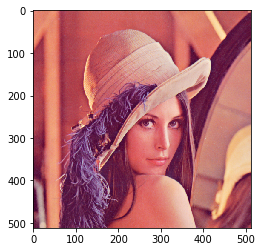

In [2]:
img = io.imread("lena.tiff")
plt.imshow(img, cmap=plt.cm.gray, interpolation='nearest')  

# CLEAN  THE NOISE  USING EDGE PRESERVING FILTER 

In [0]:
from skimage.restoration import denoise_nl_means, estimate_sigma
from skimage import img_as_ubyte, img_as_float

In [0]:
float_img = img_as_float(img)
sigma_est = np.mean(estimate_sigma(float_img, multichannel=True))


denoise_img = denoise_nl_means(float_img, h=1.15 * sigma_est, fast_mode=False, 
                               patch_size=5, patch_distance=3, multichannel=True)
                           
denoise_img_as_8byte = img_as_ubyte(denoise_img)





# CHOOSES THE REGION FOR IMAGE SEGMENTATION

In [0]:
segm1 = (denoise_img_as_8byte <= 63)
segm2 = (denoise_img_as_8byte > 63) & (denoise_img_as_8byte <= 94)
segm3 = (denoise_img_as_8byte > 94) & (denoise_img_as_8byte <= 128)
segm4 = (denoise_img_as_8byte > 128) & (denoise_img_as_8byte <= 163)
segm5 = (denoise_img_as_8byte > 163) & (denoise_img_as_8byte <= 194)
segm6 = (denoise_img_as_8byte > 188)



# DISPLAY AN IMAGE

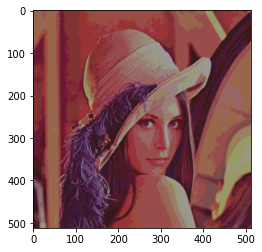

In [7]:

all_segments = np.zeros((denoise_img_as_8byte.shape[0], denoise_img_as_8byte.shape[1],3)) #nothing but denoise img size but blank

all_segments[segm1] = 0.1
all_segments[segm2] = 0.2
all_segments[segm3] = 0.3
all_segments[segm4] = 0.4
all_segments[segm5] = 0.5
all_segments[segm6] = 0.6
plt.imshow(all_segments)



# PSNR CALCULATIONS

In [0]:
def log10(x):
    numerator = tf.math.log(x)
    denominator = tf.math.log(tf.constant(10, dtype=numerator.dtype))
    return numerator / denominator




In [0]:
def psnr(im1, im2):
    img_arr1 = numpy.array(im1).astype('float32')
    img_arr2 = numpy.array(im2).astype('float32')
    mse = tf.reduce_mean(tf.math.squared_difference(img_arr1, img_arr2))
    psnr = tf.constant(255**2, dtype=tf.float32)/mse
    result = tf.constant(10, dtype=tf.float32)*log10(psnr)
    with tf.compat.v1.Session():
        result = result.eval()
    return result

# RESULT

In [10]:
psnr(img,all_segments)

5.1613855